In [8]:
import pandas as pd
import os
import json
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore', category = UserWarning, module = 'openpyxl')

with open('LIMPIADOR_TOTAL.json', 'r', encoding = 'utf-8') as f:
    DICCIONARIO_LIMPIADOR_NOMENCLATURAS = json.load(f)

    LIMPIADOR_EVE = DICCIONARIO_LIMPIADOR_NOMENCLATURAS['NOMENCLATURA EVE']
    LIMPIADOR_REDUNDANTES = DICCIONARIO_LIMPIADOR_NOMENCLATURAS['REDUNDANTES']

    LIMPIADOR_GLOBAL = LIMPIADOR_EVE | LIMPIADOR_REDUNDANTES

with open('DICCIONARIO_CODIGO_NOMBRE_FARMACOS.json', 'r') as f:
    DICCIONARIO_FARMACOS_A_MONITORIZAR = json.load(f)
    FARMACOS_A_MONITORIZAR = list(DICCIONARIO_FARMACOS_A_MONITORIZAR.values())[: -3]

In [9]:
def obtener_tabla_total():
    nombres_sensibilidades_ordenadas = sorted([excel for excel in os.listdir() if 'Fibrosis' in excel])
    dfs_a_guardar = []


    for nombre in nombres_sensibilidades_ordenadas:
        df = pd.read_excel(nombre, header = 1).dropna(how = 'all')
        df = df.fillna('-')
        df_limpia = df.copy()
        df_limpia['MICROORGANISMO'] = df_limpia['MICROORGANISMO'].map(lambda x: LIMPIADOR_GLOBAL[x] if (LIMPIADOR_GLOBAL[x] != None) else x)

        dfs_a_guardar.append(df_limpia)

    df_global = pd.concat(dfs_a_guardar)

    return df_global

In [10]:
df_global = pd.read_excel('FQ_AGRUPADO.xlsx')
cambiar_rut = {'13218653-7': '13.218.653-7',
               '15102568-4': '15.102.568-4',
               '17014710-3': '17.014.710-3',
               '17564424-5': '17.564.424-5',
               '17.564.424-': '17.564.424-5',
               '17837944-5': '17.837.944-5',
               ' 17.014.710-3': '17.014.710-3',
               'EXP': '19.485.701-2'}

df_global = df_global.replace(cambiar_rut)

In [11]:
sorted(df_global['RUT'].unique())


['10.119.950-9',
 '10.286.486-7',
 '10.574.868-K',
 '10.748.911-8',
 '12.870.958-4',
 '12.898.432-1',
 '13.045.339-2',
 '13.218.652-9',
 '13.218.653-7',
 '13.645.151-0',
 '14.035.580-1',
 '14.046.419-8',
 '14.093.422-4',
 '14.192.249-1',
 '14.480.152-0',
 '15.102.568-4',
 '15.111.277-3',
 '15.289.767-7',
 '15.472.250-5',
 '15.577.128-3',
 '15.700.678-9',
 '15.707.871-2',
 '15.722.569-3',
 '15.749.495-3',
 '15.887.267-6',
 '15.912.665-K',
 '15.946.945-K',
 '16.115.974-3',
 '16.235.862-6',
 '16.310.254-4',
 '16.458.929-3',
 '16.458.930-7',
 '16.471.607-4',
 '16.510.532-K',
 '16.625.027-7',
 '16.640.252-2',
 '16.680.052-8',
 '16.698.970-1',
 '16.742.705-7',
 '16.746.365-7',
 '16.952.013-5',
 '17.014.710-3',
 '17.397.059-5',
 '17.484.028-8',
 '17.485.973-6',
 '17.564.424-5',
 '17.655.602-1',
 '17.667.891-7',
 '17.706.756-3',
 '17.837.944-5',
 '17.927.083-8',
 '18.064.670-1',
 '18.089.308-3',
 '18.211.450-2',
 '18.221.083-8',
 '18.353.213-8',
 '18.378.886-8',
 '18.444.115-2',
 '18.467.345-2

In [85]:
for rut in df_global['RUT'].unique():
        df_paciente = df_global[df_global['RUT'] == rut]
        df_paciente = df_paciente.replace({'-': None,
                             'S': 1,
                             'I': 2,
                             'R': 3})
        
        df_paciente.to_excel(f'{rut}.xlsx')

In [86]:
df_paciente

,Unnamed: 0,N°,FECHA RECEPCION,TIPO MUESTRA,NºCEPA,RUT,NOMBRE PACIENTE,SERVICIO,COMENTARIO,FECHA INFORME,...,CAF.1,CAZ.1,DAP.1,VAN.1,GEN 120,TEICO,COL.1,CFTXMA,COTRI.1,TETRA
3710,1170,None,2022-07-13 12:53:09,Sec. Faringea,960353,15.722.569-3,ENZO SEBASTIÁN URREA SALINAS,POLICLINICO,None,2022-07-19 09:46:02,...,None,None,None,None,None,None,None,None,None,None


In [100]:
datos_paciente = pd.read_excel('13.218.652-9.xlsx')

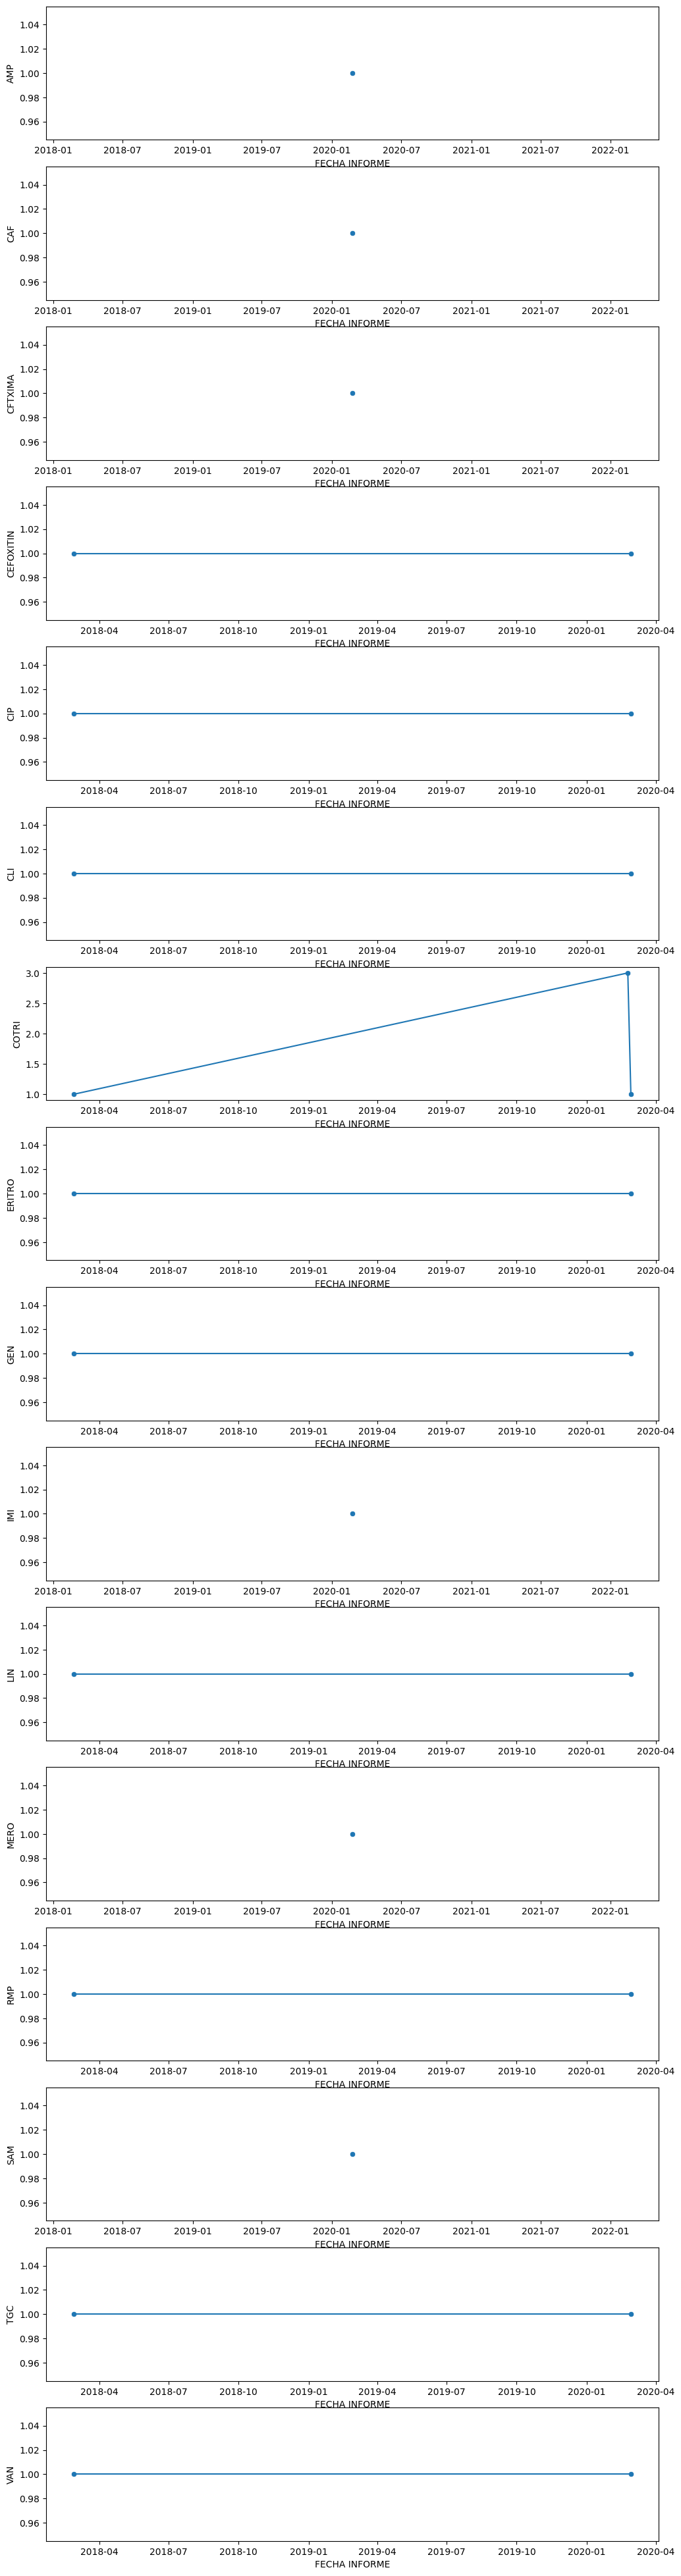

In [134]:
wide_form = pd.concat([datos_paciente['FECHA INFORME'], datos_paciente.loc[:, FARMACOS_A_MONITORIZAR]], axis = 1)
wide_form = wide_form.dropna(how = 'all', axis = 1)
farmacos_pacientes = wide_form.iloc[:, 1:].columns

fig, axis = plt.subplots(len(farmacos_pacientes), 1, figsize = (12, 50))

for i in range(len(farmacos_pacientes)):
    sns.scatterplot(data = wide_form, x = 'FECHA INFORME', y = farmacos_pacientes[i], ax = axis[i])
    sns.lineplot(data = wide_form, x = 'FECHA INFORME', y = farmacos_pacientes[i], ax = axis[i])